# Decoding Family Size Trends: Analyzing Social, Political, and Economic Factors Using GSS Data 

# Introduction

Family size, typically measured by the number of children, is influenced by a wide range of social, economic, and political factors. Understanding these influences provides key insights into broader societal trends and policy-making. In this project, we explore how variables such as age, religion, political affiliation, income, and views on abortion have impacted family size over time. Using data from the General Social Survey (GSS), which spans from 1972 to 2022, we aim to uncover patterns in family size across diverse demographic groups and social contexts.

The GSS, a well-established dataset, was ethically collected with informed consent, ensuring participants' privacy and confidentiality. As we analyze this rich source of information, we recognize the responsibility to handle sensitive topics—such as abortion and family dynamics—with care and respect. Our project takes specific ethical considerations into account, including:

- **Data Anonymity**: Ensuring that all personally identifiable information (PII) is anonymized and that no individual can be traced from the data.
- **Respecting Privacy**: Being cautious with sensitive variables, such as attitudes toward abortion and marital happiness, to prevent misrepresentation or harmful interpretations.
- **Historical Context**: Acknowledging that views on issues like abortion have evolved over time, we ensure our analysis respects the context in which the data was collected, particularly around culturally sensitive topics.
- **Ethical Use of Data**: We are committed to using the GSS data in a way that aligns with its original purpose—academic research—and are careful not to misuse it in ways that could mislead or harm public understanding.

A key focus of our analysis is the created variable 'abgen,' which encapsulates respondents’ views on abortion legality across various situations, from health risks to personal choice. This allows us to explore how moral and ethical beliefs intersect with decisions about family size. Other influential factors, such as marital happiness, race, region, and income, also help us better understand the complexity of family planning.

By examining these factors over the span of 50 years, this project aims to offer valuable insights into how social, political, and moral changes have shaped family size in the United States. Throughout, we maintain a commitment to ethical research practices, ensuring that the data is used responsibly and with the respect it deserves.


## Data Subset Description 

We chose number of children as the main topic to focus on because we knew we would need two numerical variables in order to create a scatterplot (the other one would obviously be the year), and the number of children Americans are having is an important demographic issue that could have long-standing effects on American society. We then looked used the GSS data explorer to find other variables that were asked in most or all of the years and that we thought could potentially be correlated with number of children. The chart below shows each variable, its type, and its possible values and their meanings (_GSS Data Explorer_).

Note that the data for the year 2022 is incomplete, so we have removed it and will only look at data from 1972 to 2021.

| Variable | Data Type | Possible Values | 
|:---|:---|:---|
| year | discrete | 1972, 1973, 1974, etc. up until 2021 |  
| age | discrete | 18, 19, 20, etc. up until 89 (89 or older) |
| relig | nominal | 1 (Protestant), 2 (Catholic), 3 (Jewish), 4 (None), 5 (Other), 6 (Buddhism), 7 (Hinduism), 8 (Other eastern religions), 9 (Muslim/islam), 10 (Orthodox-christian), 11 (Christian), 12 (Native american), 13 (Inter-denominational) |
| partyid | ordinal | 0 (Strong democrat), 1 (Not very strong democrat), 2 (Independent, close to democrat), 3 (Independent (neither, no response)), 4 (Independent, close to republican), 5 (Not very strong republican), 6 (Strong republican), 7 (Other party) |
| income | ordinal | 1 (under \\$1,000), 2 (\\$1,000 to \\$2,999), 3 (\\$3,000 to \\$3,999), 4 (\\$4,000 to \\$4,999), 5 (\\$5,000 to \\$5,999), 6 (\\$6,000 to \\$6,999), 7 (\\$7,000 to \\$7,999), 8 (\\$8,000 to \\$9,999), 9 (\\$10,000 to \\$14,999), 10 (\\$15,000 to \\$19,999), 11 (\\$20,000 to \\$24,999), 12 (\\$25,000 or more) |
| region | nominal | 1 (New england), 2 (Middle atlantic), 3 (East north central), 4 (West north central), 5 (South atlantic), 6 (East south atlantic), 7 (West south central), 8 (Mountain), 9 (Pacific) |
| race | nominal | 1 (White), 2 (Black), 3 (Other) |
| hapmar | ordinal | 1 (VERY HAPPY), 2 (PRETTY HAPPY), 3 (NOT TOO HAPPY) |
| abdefect | nominal | 1 (YES), 2 (NO) |
| abnomore | nominal | 1 (YES), 2 (NO) |
| abhlth | nominal | 1 (YES), 2 (NO) |
| abpoor | nominal | 1 (YES), 2 (NO) |
| abrape | nominal | 1 (YES), 2 (NO) |
| absingle | nominal | 1 (YES), 2 (NO) |
| abany | nominal | 1 (YES), 2 (NO) |
| childs | discrete | 0, 1, 2, 3, 4, 5, 6, 7, 8 (8 or more) |

## Data Exploration        

In [351]:
import pandas as pd 
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
# load sample csv
df_subset_sample = pd.read_csv('data/subset_sample.csv', index_col=0, low_memory=False, encoding='utf8') 

# load rows counts of full data
gss_full_row_counts = pd.read_csv('data/gss_full_row_counts.csv', index_col=0, low_memory=False, encoding='utf8')

# load years per variable data
gss_years_per_var = pd.read_csv('meta/gss_data_years_per_var.csv', index_col=0, low_memory=False, encoding='utf8')

# load data dictionary
gss_data_dictionary =  pd.read_csv('meta/gss_data_dictionary.csv', index_col=0, low_memory=False, encoding='latin1')

# load full subset
df_subset = pd.read_csv("data/subset_full.csv", index_col = 0, low_memory = False, encoding = "utf8")

# remove 2022 data
df_subset = df_subset[df_subset['year'] != 2022]

# Year and Age

The following line plot shows how respondents' average number of children has changed per year. Overall, the plot shows that Americans' average number of children has decreased by about 0.6 children since the GSS started. This decline was steepest early on, with the average number of children decreasing from 2.3 in 1972 to 1.8 in 2000. It then increased slightly to about 1.94 in 2008, then decreased again to 1.7 in 2021. 

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Mean Number of Children'),
 Text(0.5, 1.0, 'Average Number of Children 1972-2021')]

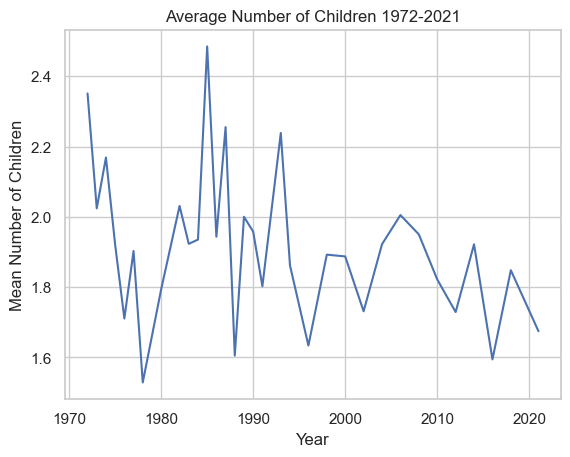

In [355]:
year_childs = df_subset[['year', 'childs']].groupby(['year'], as_index=False).agg('mean')
sn.lineplot(data=year_childs, x = 'year', y ='childs').set(xlabel="Year", ylabel="Mean Number of Children", title = "Average Number of Children 1972-2021")

Next we will compare the average number of children with respondents' ages. The following lineplot, which includes data from the entire year range, shows that the average number of children increases from almost 0 at age 18 to about 2 around age 40, then mostly levels off, only slightly increasing to around 2.5 by old age. However, it is unlikely that people are having an average of 0.5 children when they are 40+ years old. Rather, this is likely because older generations had more children, so people who were older when they were interviewed were more likely to have more children. 

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Mean Number of Children'),
 Text(0.5, 1.0, 'Average Number of Children by Age')]

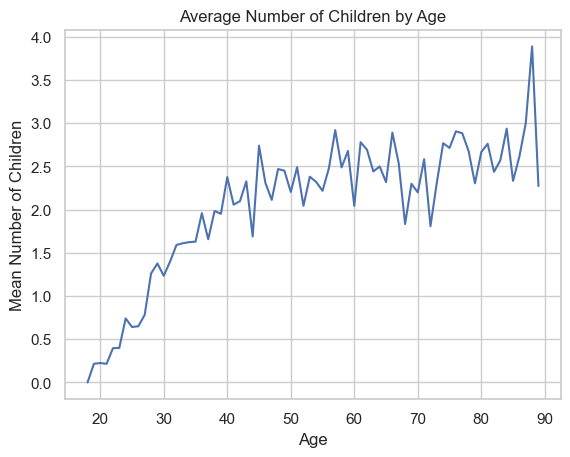

In [358]:
age_childs = df_subset[['age', 'childs']].groupby(['age'], as_index=False).agg('mean')
sn.lineplot(data=age_childs, x = 'age', y ='childs').set(xlabel="Age", ylabel="Mean Number of Children", title = "Average Number of Children by Age")

The following plot separates the respondents by generation as defined by the Pew Research Center (_Definining Our Six Generations_, 2019). Although it does appear that the average number of children at each age is slightly decreasing by generation from the Baby Boomers on, the lines are still very close. The big difference is between the Baby Boomers and the Silent Generation: after age 40, Boomers have on average almost a whole child less than Silent Generation respondents (2.8 vs. 2.0). The Greatest and Silent generations' lines are surprising: the Silent Generation's mean number of children is fairly steady from about age 40 to 60, then increases after age 60, while the Greatest Generation's line actually decreases slightly by age, to the point where it is lower than the Silent Generation's line. This is possibly due to the post-WWII baby boom, though more analysis could be done to explore this further.

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Number of Children'),
 Text(0.5, 1.0, 'Average Number of Children by Age and Generation')]

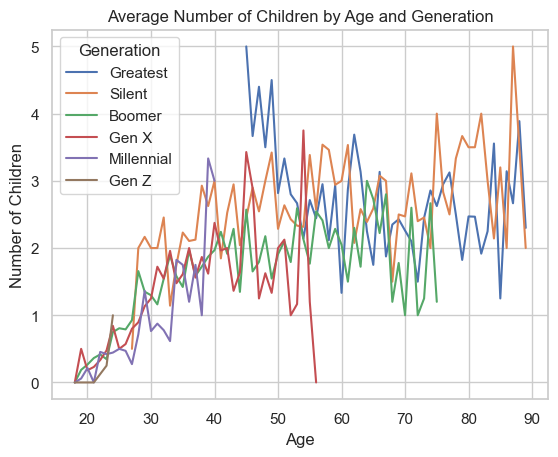

In [361]:
df_subset['approx_born'] = df_subset['year'] - df_subset['age']
df_subset['Generation'] = pd.cut(df_subset['approx_born'], [1880, 1927, 1945, 1964, 1980, 1996, 2012], 
                                 labels=['Greatest', 'Silent', 'Boomer', 'Gen X', 'Millennial', 'Gen Z'])

gen_age_childs = df_subset[['Generation', 'age', 'childs']].groupby(['Generation', 'age'], observed=True, as_index=False).agg('mean')

# Plotting the result
sns.lineplot(data=gen_age_childs, x='age', y='childs', hue='Generation').set(xlabel="Age", ylabel="Number of Children",  
                                                                             title="Average Number of Children by Age and Generation")


The following three scatterplots show the individual respondents' ages and number of children for the years 1972, 1996, and 2021. We can see that in 1972, while most respondents in their teens and early twenties had zero children, by the time they reached their thirties it was more common for them to have multiple children. For high numbers of children, the dots seem to be fairly evenly spread out from those in their 30s to those in their 70s. The linear regression line has a slope of about 0.03 children a year.

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Number of Children'),
 Text(0.5, 1.0, 'Number of Children by Age (1972)')]

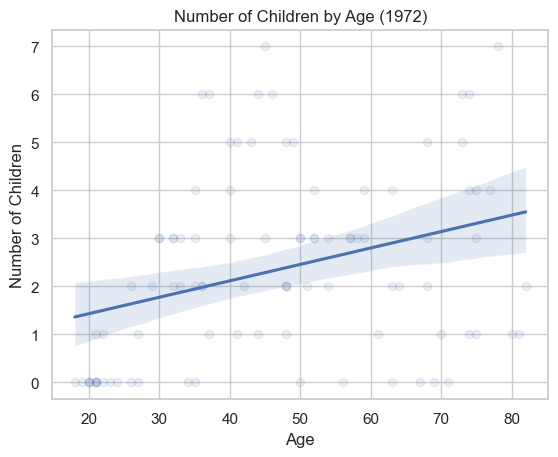

In [364]:
sn.regplot(data=df_subset.loc[df_subset['year']==1972], x = 'age', y ='childs', scatter_kws={'alpha':0.1}).set(xlabel="Age", ylabel="Number of Children", title = "Number of Children by Age (1972)")

Like in 1972, in 1996 the most common number of children is zero until around age 30. However, the respondents with high numbers of children tend to be older. The linear regression line has gotten about twice as steep, with a slope of about 0.06 children per year.

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Number of Children'),
 Text(0.5, 1.0, 'Number of Children by Age (1996)')]

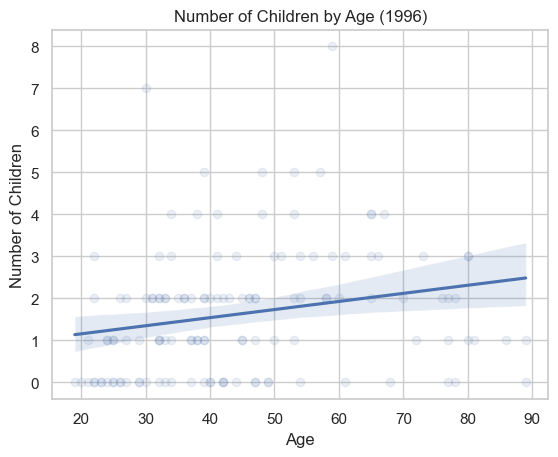

In [367]:
sn.regplot(data=df_subset.loc[df_subset['year']==1996], x = 'age', y ='childs', scatter_kws={'alpha':0.1}).set(xlabel="Age", ylabel="Number of Children", title = "Number of Children by Age (1996)")

In 2021, zero appears to be the most common number of children for respondents in their thirties, though for respondents in their forties it seems like two children is the most common. The respondents with higher numbers of children still seem to be older, but there are fewer of them compared to respondents with fewer or no children. The linear regression line has gone back down to a slope of about 0.03 children per year, albeit almost a whole child lower than in 1972. This suggests that the relationship between age and number of children has returned somewhat to what it was in 1972, but with everyone having fewer children.

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Number of Children'),
 Text(0.5, 1.0, 'Number of Children by Age (2021)')]

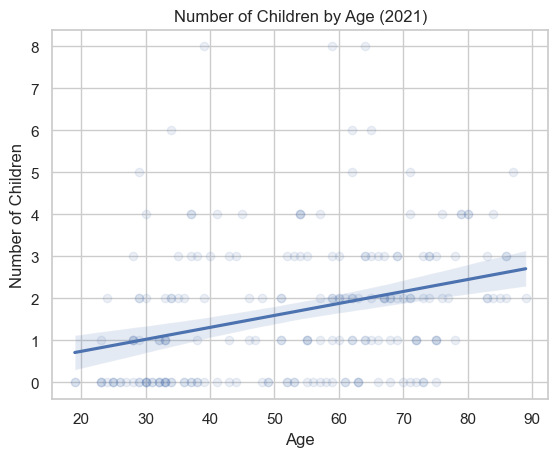

In [370]:
sn.regplot(data=df_subset.loc[df_subset['year']==2021], x = 'age', y ='childs', scatter_kws={'alpha':0.1}).set(xlabel="Age", ylabel="Number of Children", title = "Number of Children by Age (2021)")

# Beliefs About Abortion

In [373]:
def count_responses(row, target, variables):
    row_list = row.loc[variables].to_list()
    return row_list.count(target)


df_subset['num_yes'] = df_subset.apply(count_responses, axis=1, args=[1, ['abdefect', 'abnomore', 'abhlth', 'abpoor', 'abrape', 'absingle', 'abany']])
df_subset['num_no'] = df_subset.apply(count_responses, axis=1, args=[2, ['abdefect', 'abnomore', 'abhlth', 'abpoor', 'abrape', 'absingle', 'abany']])

def create_abgen(row):
    # creates variable "when should it be possible for a pregnant woman to obtain a legal abortion?"
    num_responded = row.loc['num_yes'] + row.loc['num_no']
    if num_responded == 0:
        return 'Unknown'
    if row.loc['num_yes'] == num_responded:
        return 'Always legal'
    if row.loc['num_no'] == num_responded:
        return 'Never legal'
    return 'Sometimes legal'

df_subset['abgen'] = df_subset.apply(create_abgen, axis=1)

The GSS asks respondents several questions about their beliefs about abortion, all concerning a different situation where someone might want an abortion. We created a new variable, `abgen`, to summarize these. Many respondents were not asked, or did not answer, all of the questions about abortion, so this variable only considers the questions they did answer. If their answers were "yes" to all the questions, then we assume they believe abortion should always be legal. If their answers were "no" to all questions, then we assume they believe abortion should never be legal. If they responded "yes" to some and "no" to others, then we assume they believe abortion should sometimes be legal. If they did not answer any questions about abortion, then their opinions are unknown.

The mean number of children is 1.6 for respondents who believe abortion should always be legal, 2.1 for those who believe it should sometimes be legal, and 2.5 for those who believe it should never be legal. For respondents whose beliefs about abortion are unknown, the average number of children is 1.9. Thus we can see that the average number of children is higher the less someone believes abortion should be legal. The following boxplot illustrates this, though it also shows that there are individuals with every combination of abortion opinion and number of children. It is unclear to what extent these two variables are directly correlated. Perhaps there is a direct link - those who believe abortion should always be legal are more likely to get abortions, and thus more likely to have fewer children. It is likely, however, that this correlation is due to one or more additional variables that are correlated with both abortion opinion and number of children, such as age.

[Text(0.5, 0, 'Beliefs on Abortion'),
 Text(0, 0.5, 'Number of Children'),
 Text(0.5, 1.0, 'Number of Children by Abortion Opinion')]

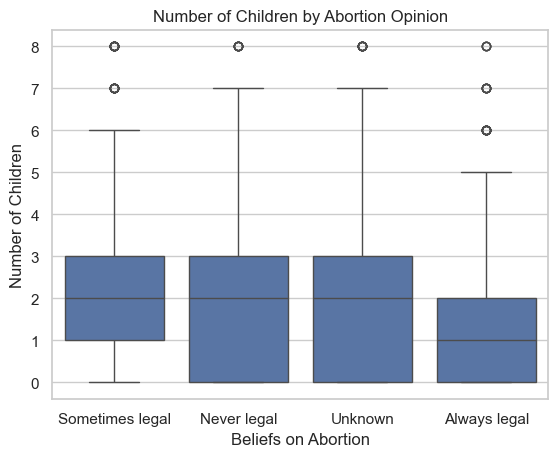

In [376]:
sn.boxplot(data = df_subset, x='abgen', y='childs').set(xlabel="Beliefs on Abortion", ylabel="Number of Children", title = "Number of Children by Abortion Opinion")

In [378]:
# Filtering the variables and cleaning the data based on the code we have 

valid_childs = df_subset[(df_subset['childs'] >= 0) & (df_subset['childs'] <= 8)].copy()

#Clean the 'income' variable

income_mapping = {
    1: 'Under $1,000', 2: '$1,000 to $2,999', 3: '$3,000 to $3,999', 4: '$4,000 to $4,999',
    5: '$5,000 to $5,999', 6: '$6,000 to $6,999', 7: '$7,000 to $7,999', 8: '$8,000 to $9,999',
    9: '$10,000 to $14,999', 10: '$15,000 to $19,999', 11: '$20,000 to $24,999', 12: '$25,000 or more'
}


valid_income = valid_childs[(valid_childs['income'] > 0) & (valid_childs['income'] <= 12)].copy()
valid_income['income_range'] = valid_income['income'].map(income_mapping)

# Sort income_range in the correct order
ordered_income_ranges = ['Under $1,000', '$1,000 to $2,999', '$3,000 to $3,999', 
                         '$4,000 to $4,999', '$5,000 to $5,999', '$6,000 to $6,999', 
                         '$7,000 to $7,999', '$8,000 to $9,999', '$10,000 to $14,999', 
                         '$15,000 to $19,999', '$20,000 to $24,999', '$25,000 or more']


valid_income['income_range'] = pd.Categorical(valid_income['income_range'], categories=ordered_income_ranges, ordered=True)

#Clean the 'region' variable

region_mapping = {
    1: 'New England', 2: 'Middle Atlantic', 3: 'East North Central', 4: 'West North Central',
    5: 'South Atlantic', 6: 'East South Atlantic', 7: 'West South Central', 8: 'Mountain', 9: 'Pacific'
}

valid_income['region_name'] = valid_income['region'].map(region_mapping)

cleaned_data = valid_income[['childs', 'income_range', 'region_name']].copy()

cleaned_data.tail()

,childs,income_range,region_name
68774,6.0,"$25,000 or more",South Atlantic
19640,8.0,"$25,000 or more",Mountain
40060,2.0,"$25,000 or more",West North Central
58155,2.0,"$25,000 or more",South Atlantic
9550,0.0,"$8,000 to $9,999",Mountain


This code snippet filters and cleans a dataset by focusing on the number of children, income, and region. It performs the following steps:

1. **Filtering `childs`**: Keeps only rows where the number of children is between 0 and 8.
2. **Cleaning `income`**: Maps income codes to descriptive income ranges, filters out invalid income values, and ensures income ranges are ordered logically.
3. **Cleaning `region`**: Maps region codes to readable region names.
4. **Final Cleaned Data**: Creates a `cleaned_data` DataFrame containing the cleaned `childs`, `income_range`, and `region_name` columns, ready for analysis.


In [381]:
# Define a generalized helper function to calculate the mean of any variables
def calculate_avg_by_group(data, group_vars, target_var):
    
    return data.groupby(group_vars, observed=True)[target_var].mean().reset_index()

# Calculate the average number of children by income range and region
avg_children_by_income_region = calculate_avg_by_group(cleaned_data, ['income_range', 'region_name'], 'childs')
avg_children_by_income_region.head()

,income_range,region_name,childs
0,"Under $1,000",East North Central,1.75
1,"Under $1,000",East South Atlantic,0.25
2,"Under $1,000",Middle Atlantic,0.80
3,"Under $1,000",Mountain,1.00
4,"Under $1,000",New England,3.00


This code defines a **helper function** that calculates the average of any specified variable based on grouped categories, and then applies it to calculate the average number of children.

1. **Helper Function**: 
   - The function `calculate_avg_by_group(data, group_vars, target_var)` takes three parameters:
     - `data`: The DataFrame containing the data.
     - `group_vars`: A list of columns to group by (e.g., `['income_range', 'region_name']`).
     - `target_var`: The variable for which to calculate the average (e.g., `'childs'`).
   - It groups the data by the specified columns (`group_vars`) and calculates the mean of the target variable (`target_var`).

2. **Application**: 
   - The helper function is used to calculate the average number of children by grouping the data based on `income_range` and `region_name`.

3. **Result**: 
   - The result is a DataFrame `avg_children_by_income_region` that shows the average number of children for each combination of income range and region.


# Average Number of Children by Income Range

This code creates a **bar plot** to visualize the average number of children by income range.

1. **Bar Plot**:
   - The `sns.barplot()` function is used to create a bar plot that shows the average number of children (`'childs'`) for each income range (`'income_range'`).
   - The `data` parameter is set to `avg_children_by_income_region`, which contains the precomputed average number of children for each income range and region.

2. **Plot Customization**:
   - The figure size is set to `(10, 6)` for better visibility.
   - The plot title is `'Average Number of Children by Income Range (Excluding 2022)'`.
   - The x-axis is labeled `'Income Range'` and the y-axis is labeled `'Average Number of Children'`.
   - The x-tick labels (income ranges) are rotated by 45 degrees to improve readability.

3. **Display**:
   - The `plt.show()` function is called to display the final bar plot.


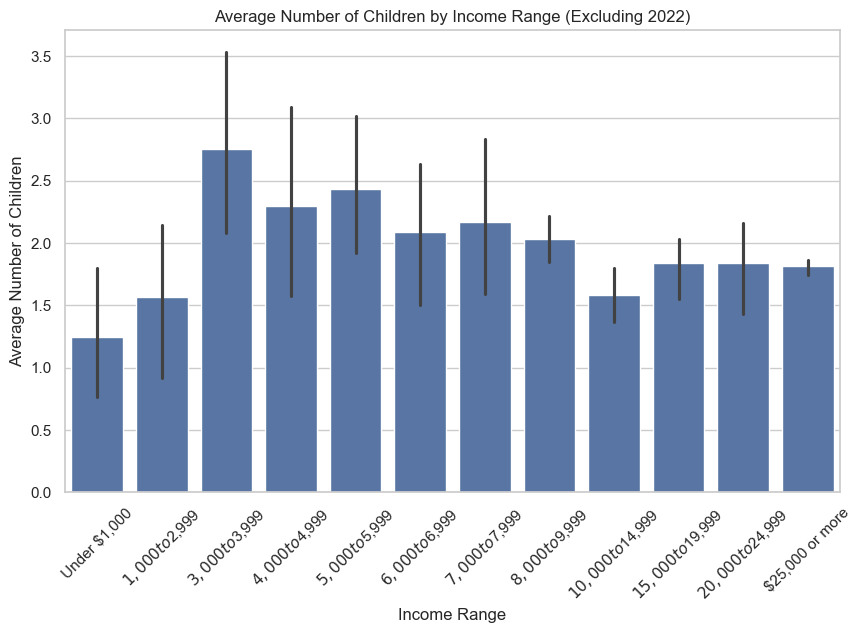

In [386]:
# Bar plot of average number of children by income range
plt.figure(figsize=(10, 6))
sn.barplot(x='income_range', y='childs', data=avg_children_by_income_region)
plt.title('Average Number of Children by Income Range (Excluding 2022)')
plt.xlabel('Income Range')
plt.ylabel('Average Number of Children')
plt.xticks(rotation=45)
plt.show()


# Average Number of Children by Region and Income Range

This code generates a **line plot** to visualize the average number of children across different income ranges, separated by region.

1. **Line Plot**:
   - The `sns.lineplot()` function creates a line plot showing the average number of children (`'childs'`) for each income range (`'income_range'`).
   - The `hue='region_name'` parameter ensures that each region is represented by a different line, with each line marked at each income range.

2. **Plot Customization**:
   - The figure size is set to `(10, 6)` for better visibility.
   - The title of the plot is `'Average Number of Children by Income Range and Region (Excluding 2022)'`.
   - The x-axis represents the income range, and the y-axis represents the average number of children.
   - The x-tick labels (income ranges) are rotated 45 degrees to improve readability.
   - A legend is added to show the regions, with the legend placed outside the plot using `bbox_to_anchor`.

3. **Display**:
   - The `plt.show()` function is used to display the final line plot.


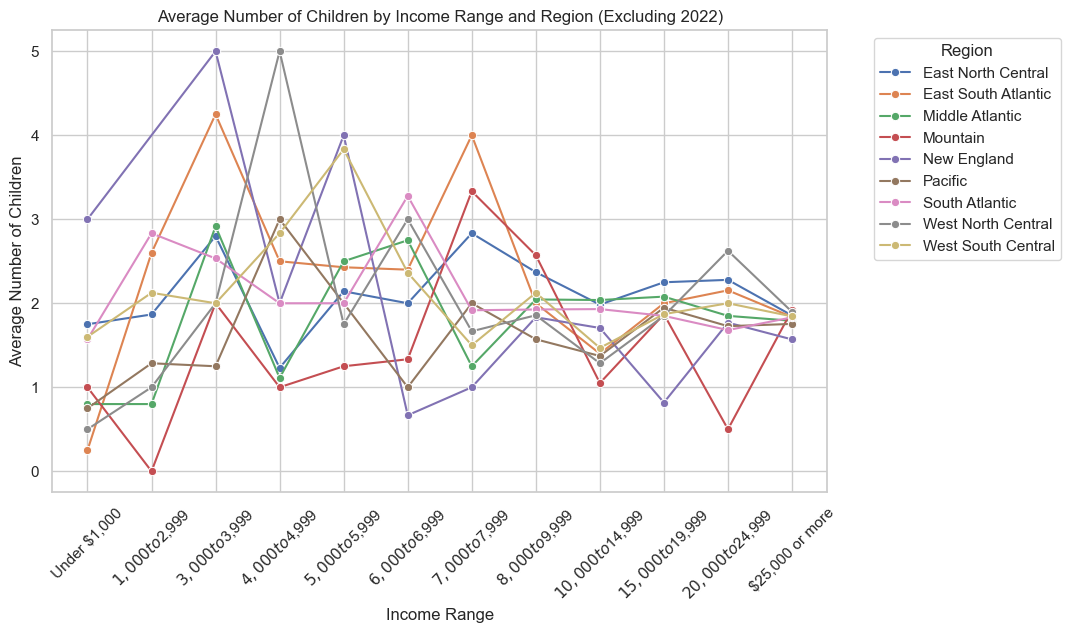

In [390]:
# Line plot of average number of children by income range and region
plt.figure(figsize=(10, 6))
sn.lineplot(x='income_range', y='childs', hue='region_name', data=avg_children_by_income_region, marker='o')
plt.title('Average Number of Children by Income Range and Region (Excluding 2022)')
plt.xlabel('Income Range')
plt.ylabel('Average Number of Children')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Number of Children by Region 

This code generates a **boxplot** to display the distribution of the number of children across different regions.

1. **Boxplot**:
   - The `sns.boxplot()` function is used to create a boxplot showing the distribution of the number of children (`'childs'`) for each region (`'region_name'`).
   - Each box represents the interquartile range (IQR) of the number of children for a specific region, with the median indicated by a line inside the box. The whiskers show the spread of the data, and any outliers are plotted as individual points.

2. **Plot Customization**:
   - The figure size is set to `(10, 6)` for better visibility.
   - The title of the plot is `'Distribution of Number of Children by Region (Excluding 2022)'`.
   - The x-axis represents the regions, and the y-axis represents the number of children.
   - The x-tick labels (regions) are rotated 45 degrees for better readability.

3. **Display**:
   - The `plt.show()` function is used to display the final boxplot, allowing for the comparison of the distribution of children across different regions.


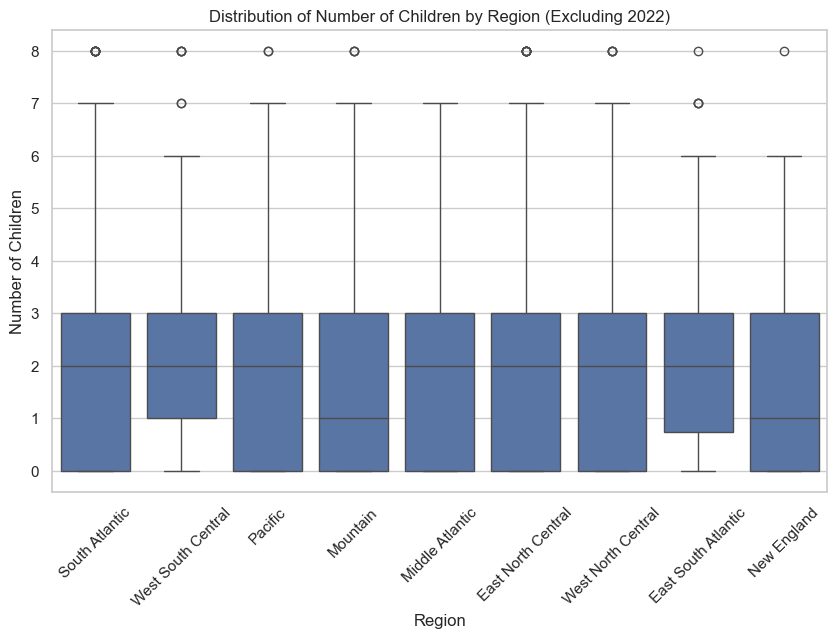

In [394]:
# Boxplot of number of children by region
plt.figure(figsize=(10, 6))
sns.boxplot(x='region_name', y='childs', data=cleaned_data)
plt.title('Distribution of Number of Children by Region (Excluding 2022)')
plt.xlabel('Region')
plt.ylabel('Number of Children')
plt.xticks(rotation=45)
plt.show()


The boxplot shows the distribution of the number of children across various regions. Each box represents the interquartile range (IQR) of the number of children, with the line inside the box indicating the median number of children for each region.

The plot reveals that the median number of children is fairly consistent across all regions, generally falling between 2 and 3 children. The **whiskers** extend quite far in all regions, showing a wide range of family sizes, with some families having up to 8 children (represented as outliers). There are also a number of outliers in every region, indicating that some families have significantly more children than the average.

No single region shows a drastically different distribution of children compared to others. All regions display similar variability, with the middle 50% of families having between 1 and 3 children, and the extreme cases (outliers) showing larger family sizes.

Overall, the boxplot indicates that the **distribution of family sizes** (in terms of number of children) is relatively uniform across regions, with only minor variations between them.


# Average Number of Children by Race and Marital Happiness

In this section of my analysis, We explored how the average number of children varies among different racial groups using data from the General Social Survey. For this purpose, We categorized the races as 1.0 for White, 2.0 for Black, and 3.0 for Other, based on the dataset documentation.

To analyze this, We used the following Python code to calculate the average number of children per family for each racial group:

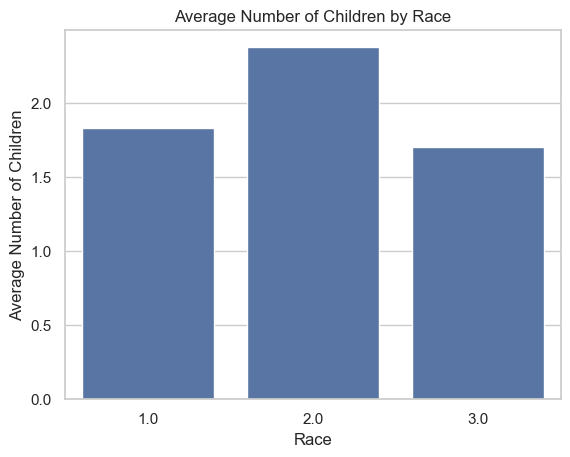

In [399]:
race_childs = df_subset[['race', 'childs']].groupby('race').mean().reset_index()
sn.barplot(data=race_childs, x='race', y='childs')
plt.title('Average Number of Children by Race')
plt.xlabel('Race')
plt.ylabel('Average Number of Children')
plt.show()

This code snippet performs a grouping operation on the race column and calculates the mean number of children (childs). The results are then visualized using a bar plot, which clearly shows that the Black racial group (2.0) has the highest average number of children, with Other and White following. This visualization highlights possible cultural, social, or economic influences on family size across different racial demographics.

From the graph, we observe that the Black racial group (2.0) tends to have the highest average number of children, slightly over 1.9 children per family. This is followed closely by the Other category (3.0) with nearly 1.8 children per family. The White group (1.0) shows a lower average, around 1.5 children per family. This data might suggest various socio-economic and cultural factors influencing family planning decisions across different races. For instance, it could reflect varying social, economic, or cultural norms and practices around family size.

In the second part of my analysis, We investigated the relationship between marital happiness and family size. Marital happiness levels were categorized into three groups: 1.0 representing Low, 2.0 representing Medium, and 3.0 representing High.

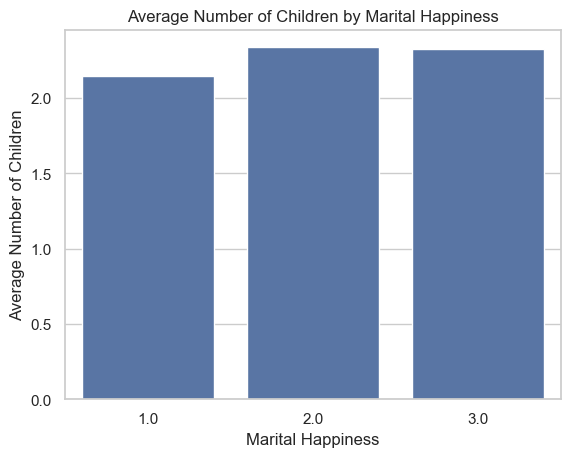

In [402]:
hapmar_childs = df_subset[['hapmar', 'childs']].groupby('hapmar').mean().reset_index()
sn.barplot(data=hapmar_childs, x='hapmar', y='childs')
plt.title('Average Number of Children by Marital Happiness')
plt.xlabel('Marital Happiness')
plt.ylabel('Average Number of Children')
plt.show()

This code groups the data by hapmar (marital happiness) and calculates the average number of children for each group. The resulting bar plot shows a surprising trend where those with High marital happiness report having fewer children, suggesting that smaller families might experience more marital satisfaction, or conversely, that larger families could correlate with lower marital happiness. This inverse relationship prompts further investigation into the stresses and demands that larger families might impose on marital relationships.

Interestingly, the results depicted an inverse relationship between marital happiness and the number of children. Families reporting High marital happiness (3.0) have the fewest children, averaging just below 1.5 children. In contrast, those reporting Low happiness (1.0) have the most children, around 2.5 on average. This could indicate that families with fewer children may have more resources, both emotional and financial, to invest in marital satisfaction, or conversely, that larger family sizes contribute to lower marital satisfaction due to increased stress and financial demands.

Finally, In my analysis, We sought to understand how marital happiness and racial identity might influence family size across different groups. To achieve this, We first modified the happiness metric in our dataset, categorizing hapmar into three distinct levels of happiness using the following criteria:

- High Happiness: Scores of 3 or higher, representing a general satisfaction with marital life.

- Medium Happiness: Scores exactly 2, indicating a neutral feeling about marital life.

- Low Happiness: Scores below 2, reflecting dissatisfaction in marital life.

We implemented this classification through a Python function, categorize_happiness, which assesses each respondent's happiness score and assigns a category accordingly. This function was applied to each row of our dataset to create a new column, happiness_category.

In [405]:
def categorize_happiness(row):
    if row['hapmar'] >= 3:
        return 'High'
    elif row['hapmar'] == 2:
        return 'Medium'
    else:
        return 'Low'

df_subset['happiness_category'] = df_subset.apply(categorize_happiness, axis=1)

Next, We grouped the data by both race and happiness_category, calculating the mean number of children for each group. This step was crucial for understanding potential patterns in family size relative to racial and marital satisfaction contexts.

In [408]:
result = df_subset.groupby(['race', 'happiness_category'])['childs'].mean().reset_index()

To visualize these relationships, I used a bar plot, which clearly illustrates the average number of children across different races and levels of marital happiness. The plot, titled "Average Number of Children by Race and Happiness Category," shows distinct bars for each combination of race and happiness level.

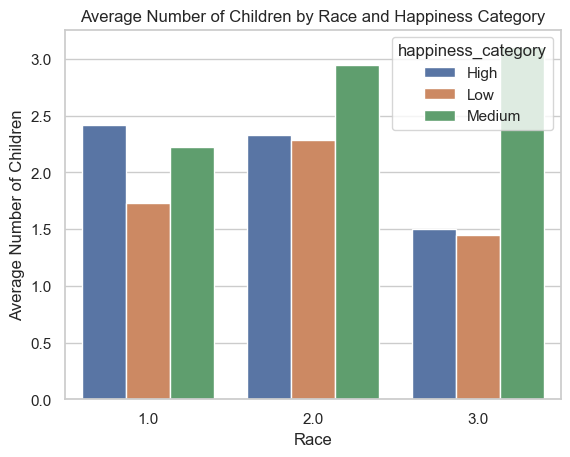

In [411]:
sn.barplot(data=result, x='race', y='childs', hue='happiness_category')
plt.title('Average Number of Children by Race and Happiness Category')
plt.xlabel('Race')
plt.ylabel('Average Number of Children')
plt.show()

From the graph, a few patterns emerge:

Individuals identified as Black (Race 2.0) tend to have more children on average across all levels of marital happiness compared to other racial groups.

There is a noticeable trend where individuals who report higher marital happiness also tend to have fewer children across all racial categories, contrary to what might be expected.

This visualization helps to highlight the complex interactions between race, marital satisfaction, and family planning decisions. It's particularly interesting to observe that higher marital satisfaction does not necessarily correlate with larger family sizes, which could be indicative of broader economic factors at play, such as access to education and reproductive health resources.

In [414]:
religion_party_df = df_subset_sample[['relig', 'partyid','year','childs']].reset_index(drop=True)
religion_mapping = {
    1.0: 'Protestant',
    2.0: 'Catholic',
    3.0: 'Jewish',
    4.0: 'None',
    5.0: 'Other', 
    6.0: 'Buddhism',
    7.0: 'Hinduism',
    8.0: 'Other Eastern Religions',
    9.0: 'Muslim',
    10.0: 'Orthodox-Christian', 
    11.0: 'Christian',
    12.0: 'Native Ameican', 
    13.0: 'Inter-nondenominational'}

religion_party_df['relig_name'] = religion_party_df['relig'].replace(religion_mapping)
# Replace numerical values with corresponding religion names

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Buddhism'),
  Text(1, 0, 'Catholic'),
  Text(2, 0, 'Christian'),
  Text(3, 0, 'Hinduism'),
  Text(4, 0, 'Inter-nondenominational'),
  Text(5, 0, 'Jewish'),
  Text(6, 0, 'Muslim'),
  Text(7, 0, 'Native Ameican'),
  Text(8, 0, 'None'),
  Text(9, 0, 'Orthodox-Christian'),
  Text(10, 0, 'Other'),
  Text(11, 0, 'Other Eastern Religions'),
  Text(12, 0, 'Protestant')])

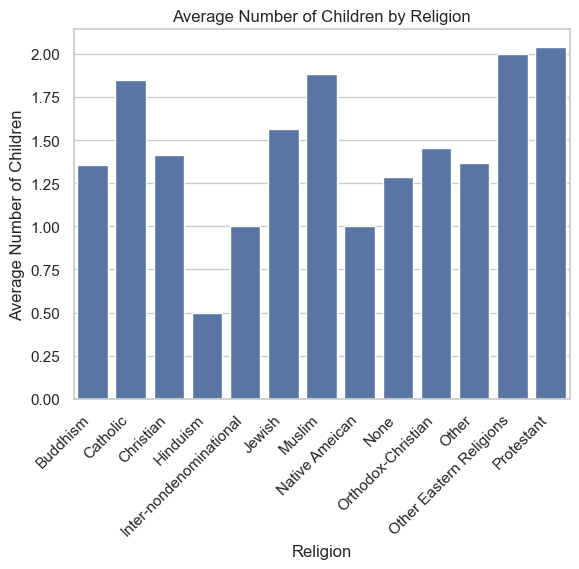

In [416]:
agg_data = religion_party_df.groupby('relig_name')['childs'].mean().reset_index()
sn.barplot(x='relig_name', y='childs', data=agg_data,)
sn.set(style='whitegrid')
plt.title('Average Number of Children by Religion')   #labels & titles
plt.xlabel('Religion')
plt.ylabel('Average Number of Children')
plt.xticks(rotation=45, ha='right')

#visual: aggregate data by calculating the avergae num of children by regligion

The graph above displays the average number of children associated with each religion. The plot highlights that Protestant (2.039) has the highest average number of children, followed closely by Other Eastern Religions (2.000). The lowest value, Hinduism (0.500) has the lowest average, indicating fewer children on average in this religious group.

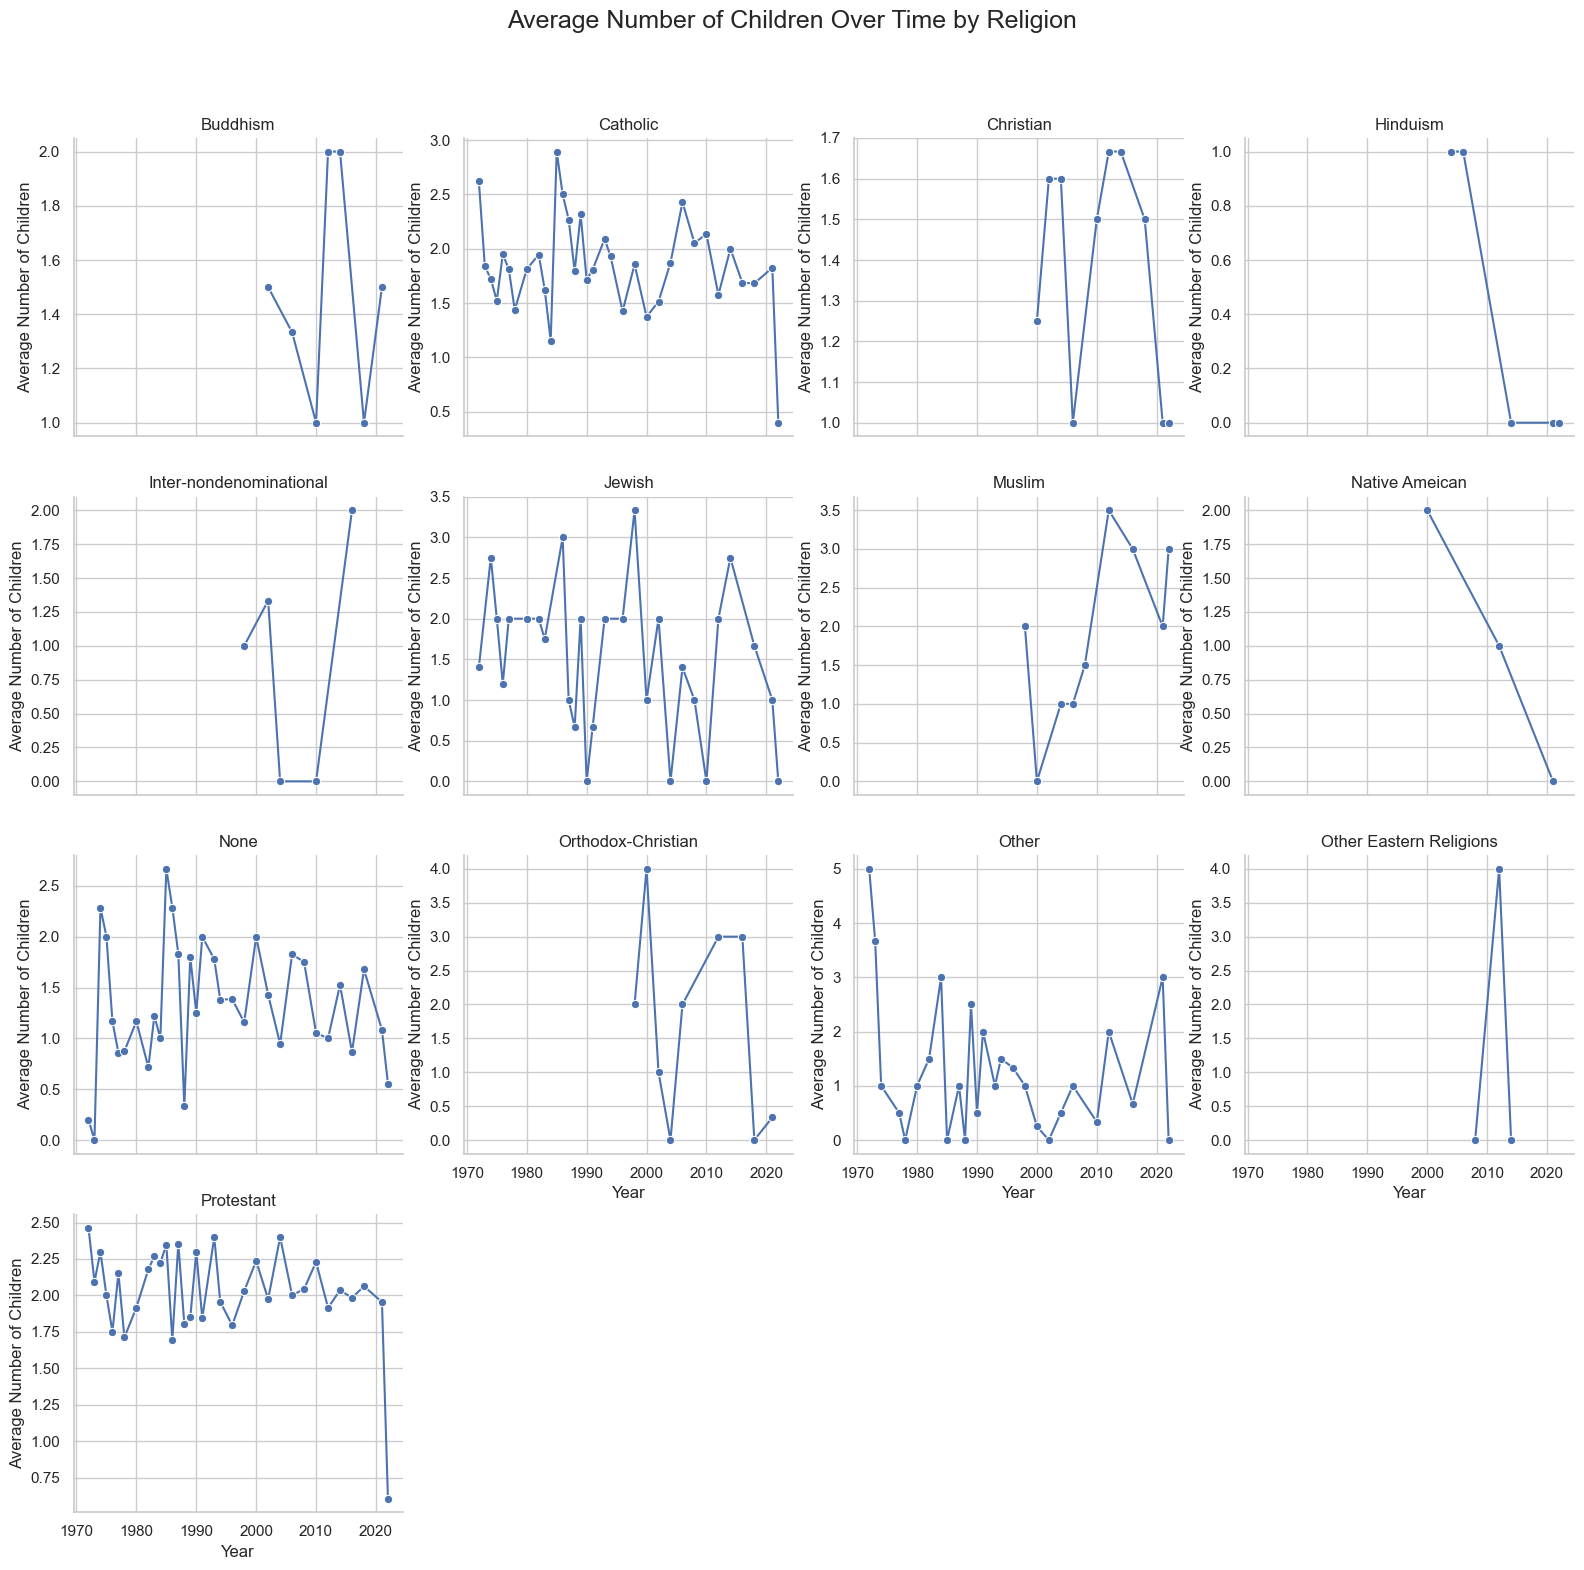

In [419]:
#visual overtime: aggregate data by calculating the avergae num of children by regligion

agg_data2 = religion_party_df.groupby(['relig_name', 'year'])['childs'].mean().reset_index()

sn.set(style='whitegrid')

# Create a FacetGrid for separate plots for each religion
g = sn.FacetGrid(agg_data2, col='relig_name', col_wrap=4, height=4, sharey=False)

g.map(sn.lineplot, 'year', 'childs', marker='o')                                    #Map the lineplot onto the grids

# Add titles and labels
g.set_titles(col_template='{col_name}')
g.set_axis_labels('Year', 'Average Number of Children')
g.set(xlabel='Year', ylabel='Average Number of Children')

# Adjust the layout to prevent overlap
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Average Number of Children Over Time by Religion', fontsize=18)

plt.show()

Above is a facetwrap arrangement of lineplots representing the trends over time of the average number of children grouped based on the different religions. It is important to note that it was not until 1998 that all religions representing lineplots were asked in the GSS survey as result for example Buddhuism, Christianity, and Native American. When analyzing the different line plots it is interersting to further consider the religions that see a steep changes in the average number of children through the years. For instance, where the respondant religous preference is Jewish, Protestant, Catholic, and None exhibit steep trend changes. Moreover in terms of the average number of children, respondants from the Protestant prefernce steadidly range on the higher approxiamtation of at least 1.50 and 2.50 chldren. Investigating the religious prefernce of respondants and its relationship to family size connects to how various faiths may have different schema for viewing the importance of having children and ideas for appropriate family size.

In [421]:
religion_party_df
agg_data3 = religion_party_df.groupby(['partyid', 'year'])['childs'].mean().reset_index()

# Mapping of partyid to political leaning
party_mapping = {
    0.0: 'Strong Dem',
    1.0: 'Not Very Strong Dem',
    2.0: 'Indep Close to Dem',
    3.0: 'Independent',
    4.0: 'Indep Close to Rep',
    5.0: 'Not Very Strong Rep',
    6.0: 'Strong Rep',
    7.0: 'Other Party' }

agg_data3['party_name'] = agg_data3['partyid'].map(party_mapping) #apply the mapping & create new column for party names

<Figure size 1200x600 with 0 Axes>

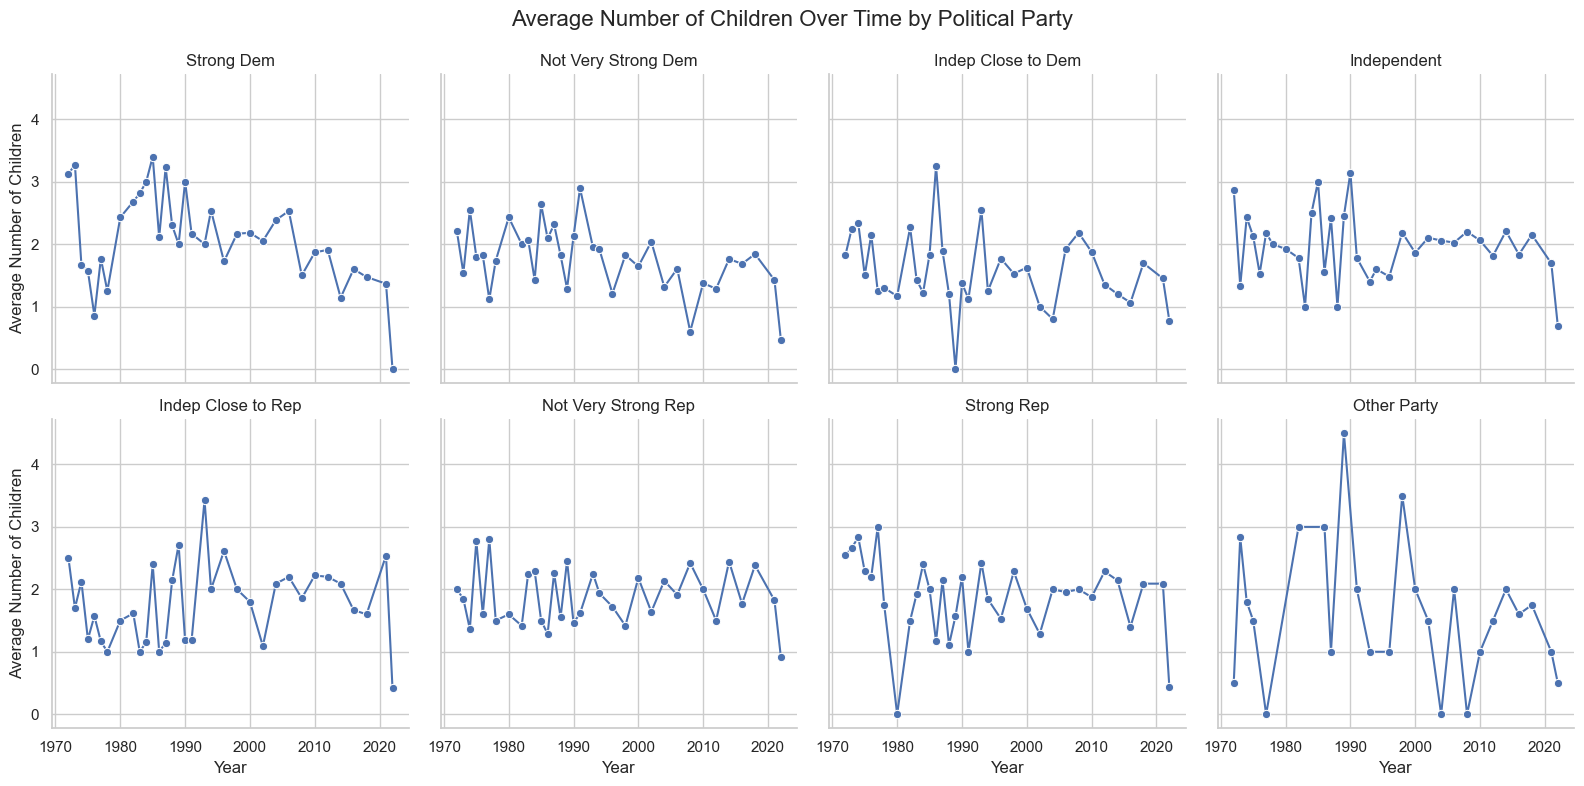

In [424]:
sns.set(style='whitegrid')

# Line plot with party names on x-axis
plt.figure(figsize=(12, 6))
g = sns.FacetGrid(agg_data3, col='party_name', col_wrap=4, height=4)
g.map(sns.lineplot, 'year', 'childs', marker='o')          # Map the lineplot onto the grid

# Add titles and labels
g.set_titles(col_template='{col_name}')
g.set_axis_labels('Year', 'Average Number of Children')
g.set(xlabel='Year', ylabel='Average Number of Children')

# Adjust layout to prevent overlap
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Average Number of Children Over Time by Political Party', fontsize=16)

plt.show()

Above depicts eight line plots depicting the various trends on the average number of children over time by political party. Overall, the average number of children of respondants from the separate political party id graphs display trends with consistant rises and falls ranging between 1-3 children. There is also overall jagged portrayal from some political parties line plots. For example, Independent Close to Democrat, Strong Republican, and Other Party reported signifanct drops in the average number of children.
Analyzing trends over the years is benefical in the way we can leveage historical context to different rises and falls such as the different impacts of major events like economic downturns and social movements. Explanations for different trends can also be attributed to policy influences on family-oriented policies like parental leave or childcare support. Parties that advocate for these policies may be more attractive to families with children. Access to reproductive health services and education policies can also impact family planning decisions, thereby affecting family size and political allegiance.

Lastly, it is important to be mindful of cultural and social values in families, for instance conservative parties may promote traditional family values, which could encourage larger families, while progressive parties might focus on individual choice regarding family planning

## Uses of Python: Technical Components

_Fill in the table below with information about how you satisfied the technical requirements of the assignment._ 
    
| Component | Usage | Explanation | 
|:---|:---|:---|
| _leave this column as-is_ | _name the method(s)/ function(s) you used_ | _Use this area to explain what you were trying to achieve with this particular use of code and to describe why you chose to use this particular method or approach_ | 
| read data as DataFrame |`read_csv` | converted GSS data and metadata to DataFrames |
| helper function | `create_abgen` | combined multiple variables into one | 
| `groupby` with aggregation method |gen_age_childs = df_subset[['gen_name', 'age', 'childs', 'gen_id']].groupby(['gen_name', 'age', 'gen_id'], as_index=False).agg('mean').sort_values(by='gen_id') | gen_name, age, and gen_id, calculating the mean of the childs column for each group, and then sorts the resulting DataFrame by gen_id.| 
| `apply` method | df_subset_sample['child_category'] = df_subset_sample['childs'].apply(categorize_children)| Applies the fucntion categorize_children(num) to the column 'childs' and then creates a new variable cloumn name 'child_category' storing the result. This approach was used to provide more clarity when viewing the Dataframe in terms of comparing the different number of kids by respondant| 
| `loc`, `iloc`, or `at`| `loc`; num_responded = row.loc['num_yes'] + row.loc['num_no']| isolated data from 1972, 1996, and 2021 to compare different years.; row.loc['num_yes'] retrieves the value from the num_yes column and row.loc['num_no'] retrieves the value from the num_no column, allowing us to sum them to get the total number of responses. | 
| three utility methods (1) | avg_children_by_income_region.head()| The line `avg_children_by_income_region.head()` is used to display the first five rows of the DataFrame `avg_children_by_income_region`. This DataFrame contains the average number of children, grouped by income range and region name. The `head()` method in pandas returns the first five rows by default, though you can specify a different number of rows by passing a value to the method. This line helps quickly inspect the first few rows of the DataFrame to verify the data or check the results.| 
| three utility methods (2) | religion_party_df = df_subset_sample[['relig', 'partyid','year','childs']].reset_index(drop=True)| The reset_index(drop=True) method resets the index of the DataFrame religion_party_df to a default integer index, effectively starting from 0. The drop=True parameter ensures that the old index is dropped rather than added as a new column in the DataFrame.| 
| three utility methods (3) |cleaned_data.tail()|The line `cleaned_data.tail()` is used to display the last five rows of the DataFrame `cleaned_data`. This DataFrame contains the cleaned dataset, which includes the number of children, income range, and region name. The `tail()` method in pandas returns the last five rows by default, though you can specify a different number of rows by passing a value to the method. This line allows you to quickly inspect the last few rows of the DataFrame to verify the data or check the results.| 
| subset as `.csv` |df_subset_sample = pd.read_csv('data/subset_sample.csv', index_col=0, low_memory=False, encoding='utf8') | From this subset csv, we were able to create subsets of our variables of interest and apply the technial skills to investigate our reserach question| 
| `cut` or `qcut` | `cut`; df_subset['age_bin'] = pd.qcut(df_subset['age'], 5) | group respondents by approximate birth year to create "generations"; Used to divide the age column of the DataFrame df_subset into five equal-sized bins (quantiles). The result of pd.qcut is then assigned to a new column called age_bin. This process categorizes the ages into discrete bins based on their distribution, making it easier to analyze age-related patterns or trends in the data.| 
| one scatter plot | seaborn.regplot(data=df_subset.loc[df_subset['year']==1972], x = 'age', y ='childs', scatter_kws={'alpha':0.1}).set(xlabel="Age", ylabel="Number of Children", title = "Number of Children by Age 1972")	 | Used to create a scatter plot with a regression line for the data from df_subset where the year is 1972. Scatter_kws={'alpha':0.1} adjusts the transparency of the scatter points, making them less opaque.| 
| one line plot | seaborn.lineplot(data=gen_age_childs, x='age', y='childs', hue='gen_name |Used to create a line plot that visualizes the relationship between age and the number of children (childs) for different generational groups. hue='gen_name' differentiates the lines by the gen_name category, allowing for a clear comparison of trends across different groups.This visualization helps to identify patterns and trends in the number of children relative to age for different generations. | 
| one sequence of boxplots |sns.boxplot(x='income_range', y='childs', data=valid_income) | Used to display a boxplot of number of children by income range. The box plot provides a summary of the distribution, showing median, quartiles, and potential outliers for the number of children within each income range, making it easy to compare groups visually. |  

# Conclusion 

In this project, we explored the General Social Survey (GSS) dataset to analyze how various demographic and social factors influence family size, particularly the number of children. Through extensive use of Python's powerful libraries such as Pandas, Seaborn, and Matplotlib, we were able to clean, process, and visualize the data effectively.

Our analysis revealed several key patterns. First, income plays a significant role in family size, with middle-income groups generally having more children than both the lowest and highest income brackets. Similarly, regional differences in the number of children were observed, although the overall trend showed that the number of children tended to decline with increasing income across most regions. We also explored generational trends, where older generations, like the Silent Generation, had more children on average than younger generations, such as Millennials and Gen Z.

In terms of social and cultural factors, we found that respondents' opinions on abortion were correlated with the number of children they had, with those who believed abortion should always be legal having fewer children than those who believed it should never be legal. Furthermore, marital happiness was found to be inversely related to the number of children, suggesting that larger family sizes might contribute to lower marital satisfaction.

Lastly, our exploration of race and religion highlighted some interesting trends, particularly the higher average number of children among Black respondents and Protestants compared to other groups. Political affiliation also played a role, as trends in family size differed across party lines, with more conservative groups tending to have slightly more children on average.

Overall, this analysis highlights the complex interplay between socio-economic, cultural, and demographic factors in shaping family size in the United States. The use of Python's tools allowed for an efficient and insightful examination of these relationships, and further research could build on these findings to explore the underlying causes behind these trends in more depth.


# Use of Python 

In this project, we used Python to efficiently handle and analyze the GSS dataset, which spans multiple decades and contains various variables. The choice of Python was driven by its extensive libraries, particularly Pandas, which allowed us to manipulate and explore the dataset effectively. 

We employed Pandas to read the data, clean and preprocess it, ensuring we handled missing values and mapped categorical variables like `income` and `region` to readable formats. The use of helper functions, such as the one created to calculate group-wise means, helped streamline the code and improve readability and reusability. This practice also contributes to better maintainability, as similar operations can be reused across different parts of the project.

To visualize the data, we leveraged Seaborn and Matplotlib for creating insightful visualizations. These libraries provided powerful, yet simple ways to generate plots, which made it easier to communicate trends in the data. For instance, we used bar plots and line plots to observe how the number of children varies across income ranges and regions.

Human readability and performance were balanced by using efficient Pandas operations like `groupby()` and `apply()`. We ensured the code adhered to reproducibility standards by keeping the data manipulations and visualizations consistent and documented. This also ensures that future analyses on similar datasets would follow a clear and structured approach.


## References              

_Defining Our Six Generations: Your guide to America’s six living generations_. (2019, February 8). Pew. https://www.pewtrusts.org/en/research-and-analysis/data-visualizations/2019/defining-our-six-generations

_GSS Data Explorer: Search Data_. NORC.org. https://gssdataexplorer.norc.org/variables/vfilter